#### Collecting data API

aa

In [ ]:
import requests
import pandas as pd

baseurl = "https://data.cityofchicago.org/resource/6zsd-86xi.json"

r = requests.get(baseurl)

print(r)

<Response [200]>


In [ ]:
if r.status_code == 200:
    crime_data = r.json()

    crime_df = pd.DataFrame(crime_data)

    print(crime_df.head(2))
else:
    print("Failed to fetch data from the API.")

         id case_number                     date                 block  iucr  \
0  13413213    JH205603  2024-03-29T13:08:00.000  067XX S JEFFERY BLVD  0560   
1  13412763    JH205118  2024-03-29T00:00:00.000     064XX S ELLIS AVE  0486   

  primary_type              description location_description  arrest  \
0      ASSAULT                   SIMPLE          GAS STATION   False   
1      BATTERY  DOMESTIC BATTERY SIMPLE            APARTMENT   False   

   domestic  ... location_zip :@computed_region_awaf_s7ux  \
0     False  ...                                       32   
1      True  ...                                       53   

  :@computed_region_6mkv_f3dw :@computed_region_vrxf_vc4k  \
0                       22538                          39   
1                       22260                           9   

  :@computed_region_bdys_3d7i :@computed_region_43wa_7qmu  \
0                         152                          33   
1                         347                       

In [ ]:
crime_df

id case_number                     date                  block  \
0    13413213    JH205603  2024-03-29T13:08:00.000   067XX S JEFFERY BLVD   
1    13412706    JH205093  2024-03-29T00:00:00.000  068XX S HERMITAGE AVE   
2    13414040    JH206757  2024-03-29T00:00:00.000   067XX S EBERHART AVE   
3    13413239    JH205813  2024-03-29T00:00:00.000  034XX N SOUTHPORT AVE   
4    13413178    JH205673  2024-03-29T00:00:00.000       102XX S MALTA ST   
..        ...         ...                      ...                    ...   
995  13413953    JH206534  2024-03-27T12:30:00.000    053XX S KENNETH AVE   
996  13411390    JH203680  2024-03-27T12:30:00.000       022XX N KNOX AVE   
997  13411079    JH203167  2024-03-27T12:28:00.000        012XX E 53RD ST   
998  13411047    JH203176  2024-03-27T12:23:00.000  060XX N MILWAUKEE AVE   
999  13411058    JH203216  2024-03-27T12:19:00.000        016XX E 53RD ST   

     iucr        primary_type  \
0    0560             ASSAULT   
1    0497             BATTERY   
2    1310     CRIMINAL DAMAGE   
3    0810               THEFT   
4    2820       OTHER OFFENSE   
..    ...                 ...   
995  0610            BURGLARY   
996  1130  DECEPTIVE PRACTICE   
997  0320             ROBBERY   
998  5002       OTHER OFFENSE   
999  1220  DECEPTIVE PRACTICE   

                                           description location_description  \
0                                               SIMPLE          GAS STATION   
1    AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...             SIDEWALK   
2                                          TO PROPERTY            APARTMENT   
3                                            OVER $500           RESTAURANT   
4                                     TELEPHONE THREAT            RESIDENCE   
..                                                 ...                  ...   
995                                     FORCIBLE ENTRY            APARTMENT   
996                           FRAUD OR CONFIDENCE GAME            RESIDENCE   
997                             STRONG ARM - NO WEAPON                 BANK   
998                              OTHER VEHICLE OFFENSE               STREET   
999                   THEFT OF LOST / MISLAID PROPERTY             SIDEWALK   

     arrest  domestic  ... location_zip :@computed_region_awaf_s7ux  \
0     False     False  ...                                       32   
1     False      True  ...                                       17   
2     False     False  ...                                       53   
3     False     False  ...                                       38   
4     False     False  ...                                       18   
..      ...       ...  ...          ...                         ...   
995   False     False  ...                                       35   
996   False     False  ...                                        7   
997   False     False  ...                                        1   
998   False     False  ...                                       20   
999   False     False  ...                                        1   

    :@computed_region_6mkv_f3dw :@computed_region_vrxf_vc4k  \
0                         22538                          39   
1                         22257                          65   
2                         22260                           9   
3                          4449                          57   
4                         22212                          71   
..                          ...                         ...   
995                       22248                          60   
996                       22615                          19   
997                       21192                           8   
998                       22532                          36   
999                       21192                           8   

    :@computed_region_bdys_3d7i :@computed_region_43wa_7qmu  \
0                           152                          33   
1   

#### Preprocessing

In [ ]:
crime_df.dtypes

id                             object
case_number                    object
date                           object
block                          object
iucr                           object
primary_type                   object
description                    object
location_description           object
arrest                           bool
domestic                         bool
beat                           object
district                       object
ward                           object
community_area                 object
fbi_code                       object
x_coordinate                   object
y_coordinate                   object
year                           object
updated_on                     object
latitude                       object
longitude                      object
location                       object
location_address               object
location_city                  object
location_state                 object
location_zip                   object
:@computed_r

In [ ]:
selected_columns = [
    'id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description',
    'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward',
    'community_area', 'fbi_code', 'year',
    'updated_on', 'latitude', 'longitude', 'location_address',
    'location_city', 'location_state', 'location_zip'
]


new_crime_df = crime_df[selected_columns].copy()


data_types = {
    'id': 'int',
    'case_number': 'string',
    'date': 'datetime64[ns]', # Convert to datetime data type
    'block': 'string',
    'iucr': 'string',
    'primary_type': 'string',
    'description': 'string',
    'location_description': 'string',
    'arrest': 'bool',
    'domestic': 'bool',
    'beat': 'string',
    'district': 'string',
    'ward': 'object',
    'community_area': 'string',
    'fbi_code': 'object',
    'year': 'object',
    'updated_on': 'datetime64[ns]',  # Convert to datetime data type
    'latitude': 'float64',  # Convert to float data type
    'longitude': 'float64',
    'location_address': 'string',
    'location_city': 'string',
    'location_state': 'string',
    'location_zip': 'string'
}

new_crime_df= new_crime_df.astype(data_types)

# Display the data types of the new DataFrame
print(new_crime_df.dtypes)


id                               int64
case_number             string[python]
date                    datetime64[ns]
block                   string[python]
iucr                    string[python]
primary_type            string[python]
description             string[python]
location_description    string[python]
arrest                            bool
domestic                          bool
beat                    string[python]
district                string[python]
ward                            object
community_area          string[python]
fbi_code                        object
year                            object
updated_on              datetime64[ns]
latitude                       float64
longitude                      float64
location_address        string[python]
location_city           string[python]
location_state          string[python]
location_zip            string[python]
dtype: object


In [ ]:
# Checking for missing values
missing_values = new_crime_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                       0
case_number              0
date                     0
block                    0
iucr                     0
primary_type             0
description              0
location_description     1
arrest                   0
domestic                 0
beat                     0
district                 0
ward                     0
community_area           0
fbi_code                 0
year                     0
updated_on               0
latitude                10
longitude               10
location_address        10
location_city           10
location_state          10
location_zip            10
dtype: int64


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'date' is the column containing the date and time
# Convert the 'date' column to datetime format first
new_crime_df['date'] = pd.to_datetime(new_crime_df['date'])

# Separate date and time into new columns
new_crime_df['date_only'] = new_crime_df['date'].dt.date
new_crime_df['time_only'] = new_crime_df['date'].dt.time




In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'date' is the column containing the date and time
# Convert the 'date' column to datetime format first
crime_df['date'] = pd.to_datetime(crime_df['date'])

# Separate date and time into new columns
crime_df['date_only'] = crime_df['date'].dt.date
crime_df['time_only'] = crime_df['date'].dt.time


In [ ]:
crime_df.dropna(inplace=True)

In [ ]:
crime_df.drop(columns=[":@computed_region_8hcu_yrd4", ":@computed_region_d3ds_rm58", ":@computed_region_d9mm_jgwp", ":@computed_region_rpca_8um6", ":@computed_region_43wa_7qmu", ":@computed_region_bdys_3d7i", ":@computed_region_vrxf_vc4k", ":@computed_region_6mkv_f3dw"], inplace=True)


In [ ]:
selected_columns = [
    'id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description',
    'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward',
    'community_area', 'fbi_code', 'year',
    'updated_on', 'latitude', 'longitude', 'location_address',
    'location_city', 'location_state', 'location_zip'
]


new_crime_df = crime_df[selected_columns].copy()


data_types = {
    'id': 'int',
    'case_number': 'string',
    'date': 'datetime64[ns]', # Convert to datetime data type
    'block': 'string',
    'iucr': 'string',
    'primary_type': 'string',
    'description': 'string',
    'location_description': 'string',
    'arrest': 'bool',
    'domestic': 'bool',
    'beat': 'string',
    'district': 'string',
    'ward': 'object',
    'community_area': 'string',
    'fbi_code': 'object',
    'year': 'object',
    'updated_on': 'datetime64[ns]',  # Convert to datetime data type
    'latitude': 'float64',  # Convert to float data type
    'longitude': 'float64',
    'location_address': 'string',
    'location_city': 'string',
    'location_state': 'string',
    'location_zip': 'string'
}

new_crime_df= new_crime_df.astype(data_types)

# Display the data types of the new DataFrame
print(new_crime_df.dtypes)


id                               int64
case_number             string[python]
date                    datetime64[ns]
block                   string[python]
iucr                    string[python]
primary_type            string[python]
description             string[python]
location_description    string[python]
arrest                            bool
domestic                          bool
beat                    string[python]
district                string[python]
ward                            object
community_area          string[python]
fbi_code                        object
year                            object
updated_on              datetime64[ns]
latitude                       float64
longitude                      float64
location_address        string[python]
location_city           string[python]
location_state          string[python]
location_zip            string[python]
dtype: object


In [ ]:
new_crime_df.drop(columns=['location_address', 'location_city', 'location_state', 'location_zip'], inplace=True)

#### Visualization

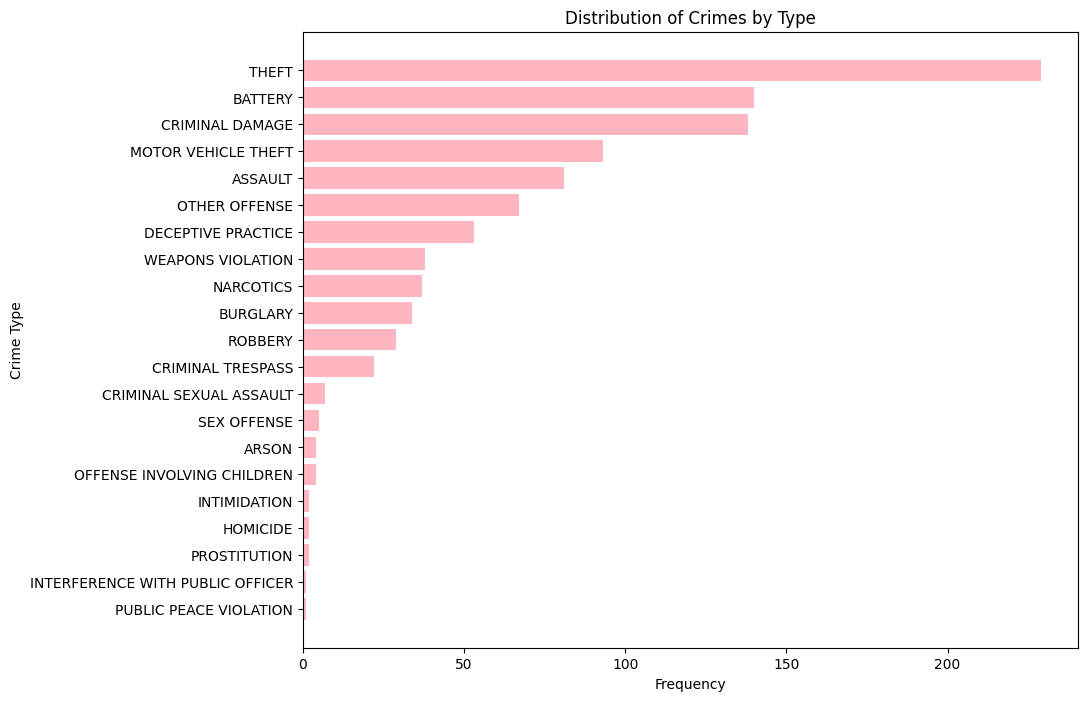

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
crime_type_counts = new_crime_df['primary_type'].value_counts()
crime_type_counts_sorted = crime_type_counts.sort_values(ascending=True)  # Sort the counts in ascending order

plt.barh(crime_type_counts_sorted.index, crime_type_counts_sorted.values, color='lightpink')
plt.title('Distribution of Crimes by Type')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.show()


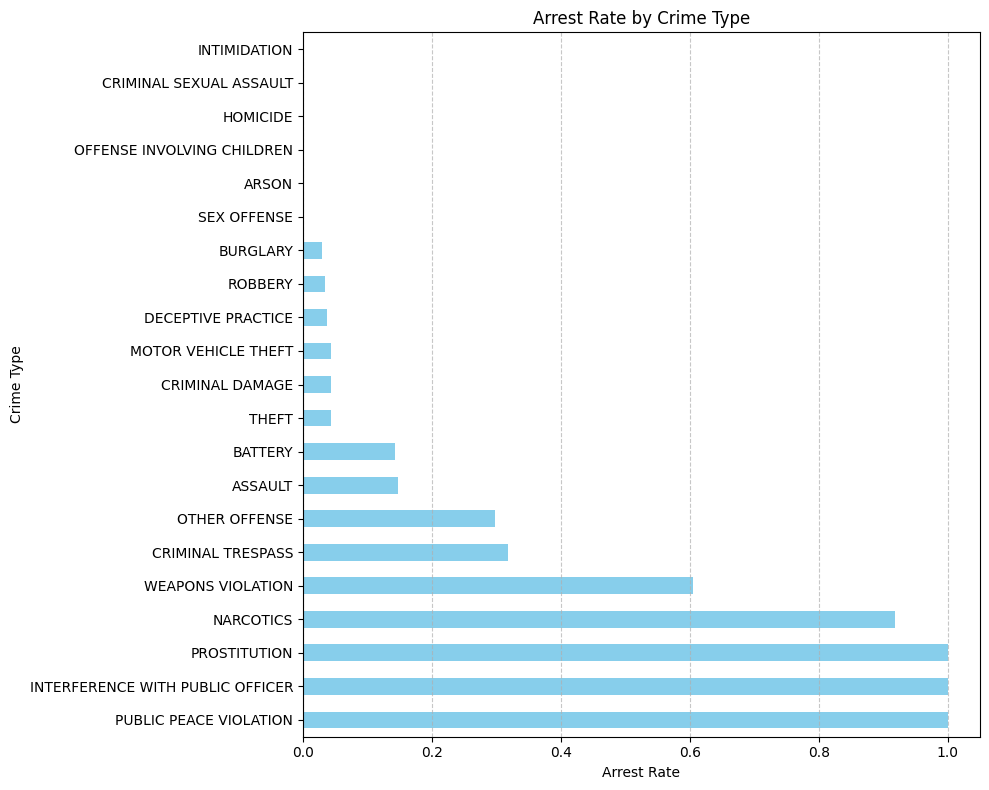

In [ ]:
plt.figure(figsize=(10, 8))
arrest_rate = new_crime_df.groupby('primary_type')['arrest'].mean().sort_values(ascending=False)
arrest_rate.plot(kind='barh', color='skyblue')
plt.title('Arrest Rate by Crime Type')
plt.xlabel('Arrest Rate')
plt.ylabel('Crime Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import folium
# Create a map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add crime locations as circle markers to the map
for index, row in new_crime_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        fill=True,
        fill_opacity=0.6,
        color='red',
        fill_color='red',
        tooltip=f"{row['primary_type']}: {row['description']}"
    ).add_to(chicago_map)

# Display the map
chicago_map


In [ ]:
import folium
from folium.plugins import HeatMap

crime_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

heat_data = new_crime_df[['latitude', 'longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=10).add_to(crime_map)

crime_map

In [ ]:
import folium

crime_types = ['ASSAULT', 'THEFT', 'BATTERY']

chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

colors = {'ASSAULT': 'red', 'THEFT': 'blue', 'BATTERY': 'green'}

for crime_type in crime_types:
    crime_df = new_crime_df[new_crime_df['primary_type'] == crime_type]
    for index, row in crime_df.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            fill=True,
            fill_opacity=0.6,
            color=colors[crime_type],
            fill_color=colors[crime_type],
            tooltip=f"{row['primary_type']}: {row['description']}"
        ).add_to(chicago_map)

chicago_map


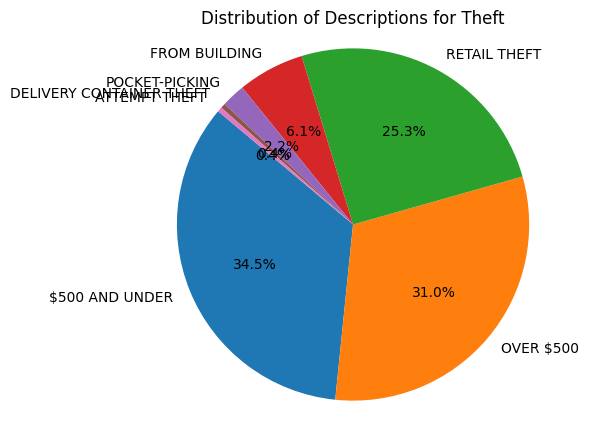

In [ ]:
import matplotlib.pyplot as plt
theft_df = new_crime_df[new_crime_df['primary_type'] == 'THEFT']

description_counts = theft_df['description'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(description_counts, labels=description_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Descriptions for Theft')
plt.axis('equal')
plt.show()


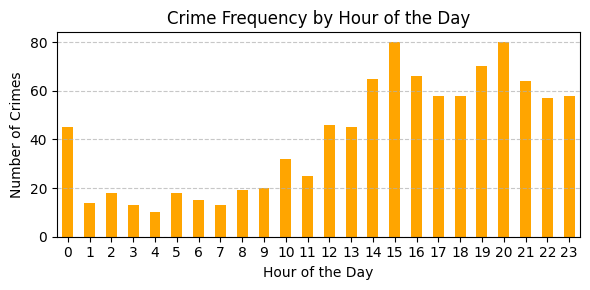

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

new_crime_df['hour_of_day'] = new_crime_df['date'].dt.hour

# Plotting crime frequency by hour of the day
plt.figure(figsize=(6, 3))
new_crime_df['hour_of_day'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Crime Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-20-046911f23dfa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_count_by_community.index, y=crime_count_by_community.values, palette='husl')


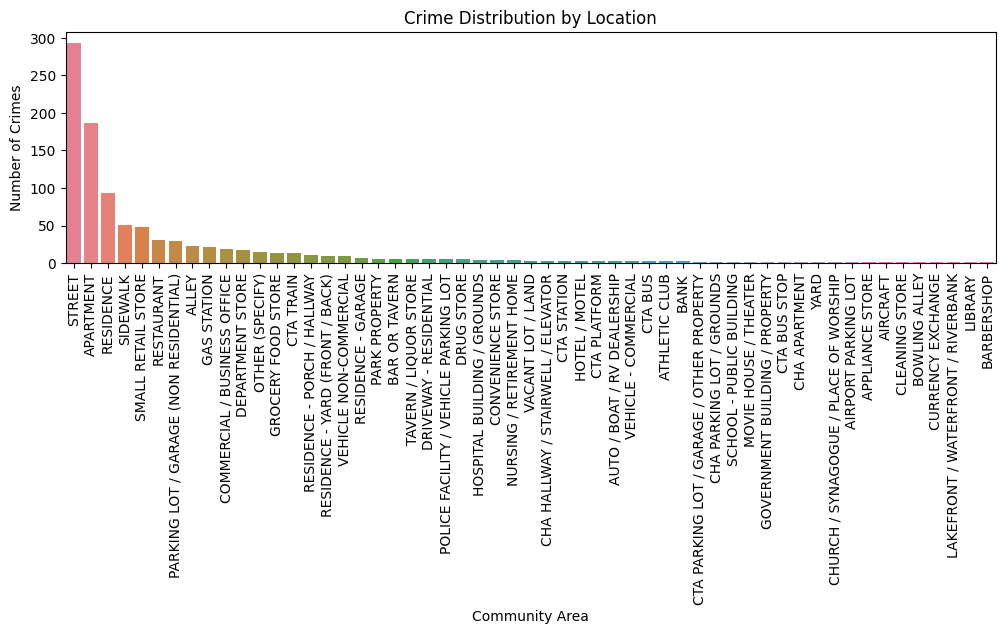

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

crime_count_by_community = new_crime_df['location_description'].value_counts()

# Plotting crime distribution by community area
plt.figure(figsize=(12, 3))
sns.barplot(x=crime_count_by_community.index, y=crime_count_by_community.values, palette='husl')
plt.title('Crime Distribution by Location')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()


Clustering:

- 1) Kmeans:-

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_columns = ['location_description','primary_type']

features = [
    'latitude', 'longitude', 'arrest', 'domestic'
] + categorical_columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), categorical_columns),  # Use sparse=False for dense matrix
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Scale numerical features
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Perform KMeans clustering
])

X = new_crime_df[features]

pipeline.fit(X)

cluster_labels = pipeline.named_steps['kmeans'].labels_

new_crime_df['cluster'] = cluster_labels

cluster_explanation = {
    0: "High Crime Rate Areas with frequent arrests and domestic incidents in public locations.",
    1: "Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.",
    2: "Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts."
}

for cluster, explanation in cluster_explanation.items():
    print(f"Cluster {cluster}: {explanation}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts.


In [ ]:
cluster_counts = new_crime_df['cluster'].value_counts()
print(cluster_counts)

cluster
1    498
0    313
2    171
Name: count, dtype: int64


In [ ]:
import folium

mean_lat = new_crime_df['latitude'].mean()
mean_lon = new_crime_df['longitude'].mean()
crime_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

cluster_colors = ['blue', 'orange', 'black']

for index, row in new_crime_df.iterrows():
    cluster_color = cluster_colors[row['cluster']]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color
    ).add_to(crime_map)

crime_map


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

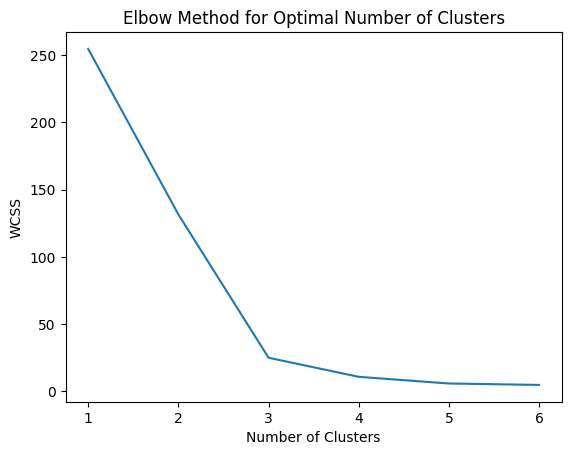

In [ ]:
#Elbow method:

numerical_features = ['latitude', 'longitude', 'arrest', 'domestic']

X_numerical = new_crime_df[numerical_features]

wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_numerical)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 7), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- 2) Heirarchical:

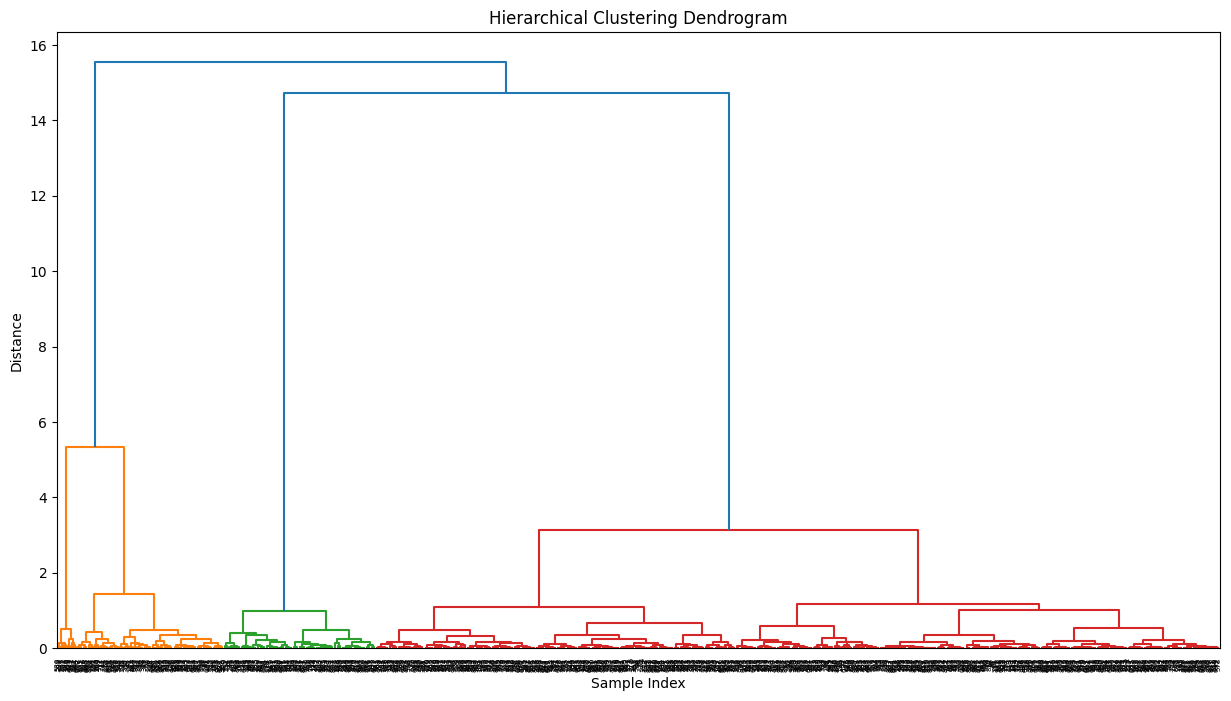

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

numerical_columns = ['latitude', 'longitude', 'arrest', 'domestic']
X_numeric = new_crime_df[numerical_columns]

Z = linkage(X_numeric, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


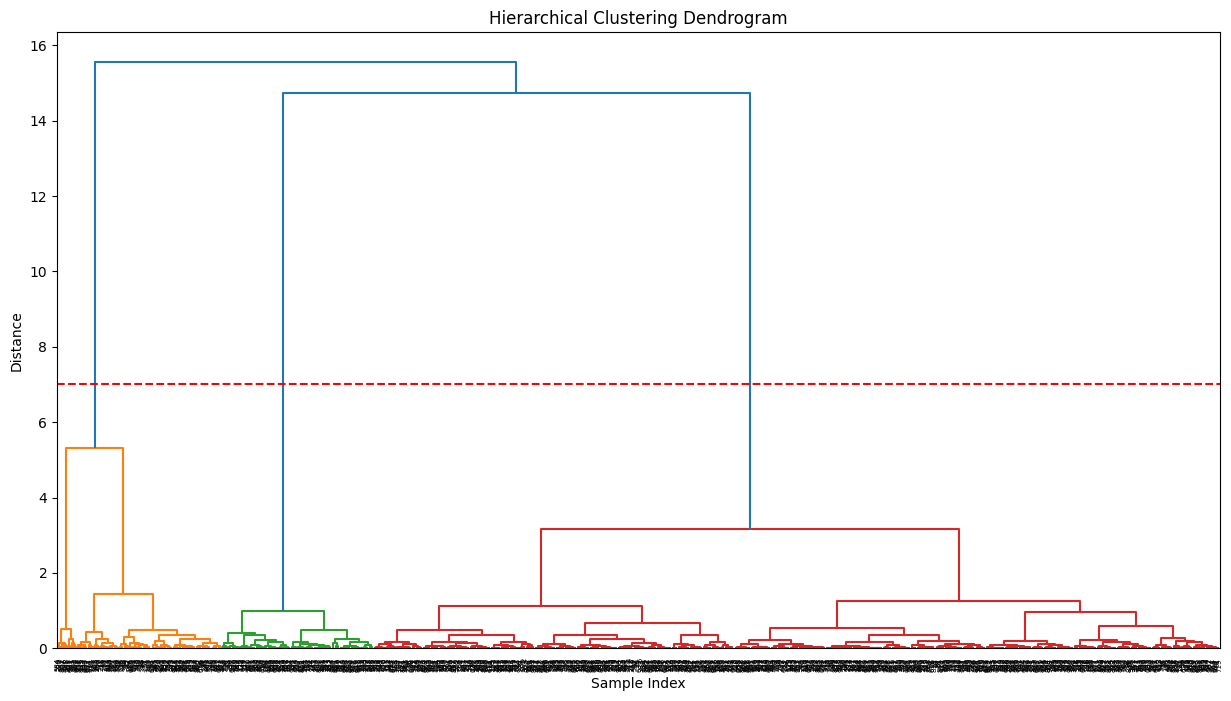

In [ ]:
# Let's cut the Dendogram at level 4 to get 3 clusters for heirarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

numerical_columns = ['latitude', 'longitude', 'arrest', 'domestic']
X_numeric = new_crime_df[numerical_columns]

Z = linkage(X_numeric, method='ward')

# Plotting dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z)

height = 7
plt.axhline(y=height, color='r', linestyle='--', label=f'Height = {height}')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
#Now forming actual clusters by applying agglomerative clustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_columns = ['location_description','primary_type']

features = [
    'latitude', 'longitude', 'arrest', 'domestic'
] + categorical_columns  # Include categorical columns for clustering

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), categorical_columns),  # Use sparse=False for dense matrix
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('agglomerative', AgglomerativeClustering(n_clusters=3))  # Performing hierarchical clustering
])

X = new_crime_df[features]

pipeline.fit(X)

# Get cluster labels
cluster_labels = pipeline.named_steps['agglomerative'].labels_

new_crime_df['cluster'] = cluster_labels

for cluster, explanation in cluster_explanation.items():
    print(f"Cluster {cluster}: {explanation}")


Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import folium

mean_lat = new_crime_df['latitude'].mean()
mean_lon = new_crime_df['longitude'].mean()
crime_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

cluster_colors = ['yellow', 'pink', 'red']

for index, row in new_crime_df.iterrows():
    cluster_color = cluster_colors[row['cluster']]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color
    ).add_to(crime_map)

# Display the map
crime_map


- Performing PCA

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_columns = ['primary_type', 'description', 'location_description']
numerical_columns = ['arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'year', 'latitude', 'longitude']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ],
    remainder='drop'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=2))
])

X = new_crime_df.drop(['id', 'case_number', 'date', 'block', 'iucr', 'fbi_code', 'updated_on', 'date_only', 'time_only'], axis=1)

X_svd = pipeline.fit_transform(X)

svd_df = pd.DataFrame(data=X_svd, columns=['SVD1', 'SVD2'])


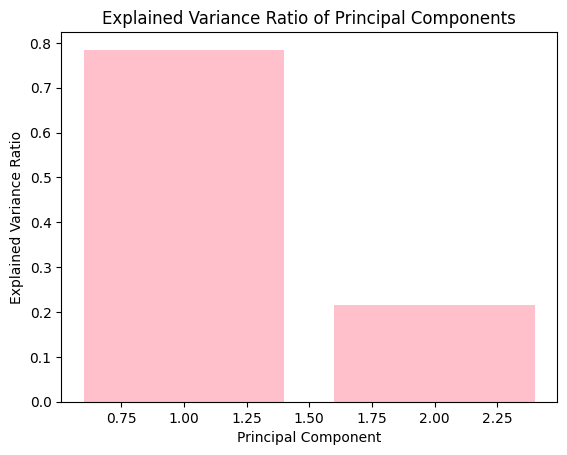

In [ ]:
import matplotlib.pyplot as plt

explained_variance = pipeline.named_steps['svd'].explained_variance_

explained_variance_ratio = explained_variance / explained_variance.sum()

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='pink')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()


- #### Applying different classifier to predict our labels

Data Preperation:

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Filling missing values in 'arrest' and 'domestic' columns with False
new_crime_df['arrest'] = new_crime_df['arrest'].fillna(False)
new_crime_df['domestic'] = new_crime_df['domestic'].fillna(False)

# Converting 'arrest' and 'domestic' columns to boolean
new_crime_df['arrest'] = new_crime_df['arrest'].astype(bool)
new_crime_df['domestic'] = new_crime_df['domestic'].astype(bool)

# Encoding the data
label_encoder = LabelEncoder()

string_columns = ['case_number', 'block', 'iucr', 'primary_type', 'description',
                  'location_description', 'beat', 'district', 'ward',
                  'community_area', 'fbi_code', 'year']

for col in string_columns:
    new_crime_df[col] = label_encoder.fit_transform(merged_df[col])

# Now you can will proceed with splitting the data and training the classifier


1) Naive Bayes Classifier:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Spliting data into features (X) and target (y)
X = new_crime_df.drop(columns=['cluster', 'date', 'updated_on'])  # Assuming 'cluster' is the target variable
y = new_crime_df['cluster']

# Spliting data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replacing negative values with zeros
X_train[X_train < 0] = 0



In [ ]:
# fitting the Naive Bayes classifier to our data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predicting on the testing set
y_pred = nb_classifier.predict(X_test)

In [ ]:
# Evaluating the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[21 43  0]
 [17 83  0]
 [ 8 23  2]]
Accuracy: 0.5380710659898477


Let us check if applying balancing techniques will help us increase the accuracy.

In [ ]:
# Applying RandomOverSampler to balance the classes
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = nb_classifier.predict(X_test)

# Evaluating the classifier
conf_matrix1 = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix1)
print("Accuracy:", accuracy1)


Confusion Matrix:
 [[34 25  5]
 [34 48 18]
 [ 9 10 14]]
Accuracy: 0.4873096446700508


In [ ]:
# Applying RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = nb_classifier.predict(X_test)

# Evaluating the classifier
conf_matrix2 = confusion_matrix(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix2)
print("Accuracy:", accuracy2)


Confusion Matrix:
 [[34 28  2]
 [35 48 17]
 [13  8 12]]
Accuracy: 0.47715736040609136


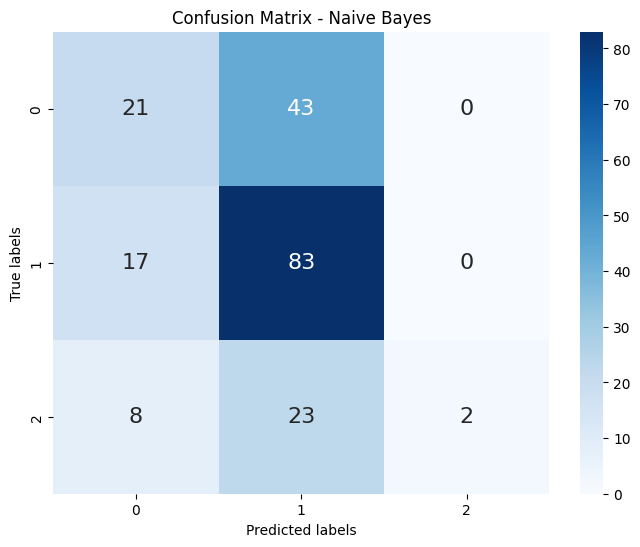

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix for Naive Bayes classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


After checking both balancing techincs, conclusion is made that we do not need any of it. We are getting better accuracy withour using any of these techniqies.

2) Decision Tree Classifier:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initializing and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predicting on the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluating the Decision Tree classifier
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(conf_matrix_dt)
print("Decision Tree Accuracy:", accuracy_dt)

[[56  6  2]
 [ 9 90  1]
 [ 3  3 27]]
Decision Tree Accuracy: 0.8781725888324873


Applying the balancing techniques to our data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initializing the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Resampling the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_resampled, y_resampled)

y_pred_dt = dt_classifier.predict(X_test)

# Evaluating the Decision Tree classifier
conf_matrix_dt1 = confusion_matrix(y_test, y_pred_dt)
accuracy_dt1 = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Confusion Matrix (after undersampling):\n", conf_matrix_dt1)
print("Decision Tree Accuracy (after undersampling):", accuracy_dt1)


Decision Tree Confusion Matrix (after undersampling):
 [[57  5  2]
 [10 90  0]
 [ 2  1 30]]
Decision Tree Accuracy (after undersampling): 0.8984771573604061


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

dt_classifier2 = DecisionTreeClassifier()
dt_classifier2.fit(X_resampled, y_resampled)

y_pred_dt = dt_classifier2.predict(X_test)

# Evaluate the Decision Tree classifier
conf_matrix_dt2 = confusion_matrix(y_test, y_pred_dt)
accuracy_dt2 = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Confusion Matrix (after oversampling):\n", conf_matrix_dt2)
print("Decision Tree Accuracy (after oversampling):", accuracy_dt2)


Decision Tree Confusion Matrix (after oversampling):
 [[56  5  3]
 [ 5 95  0]
 [ 3  3 27]]
Decision Tree Accuracy (after oversampling): 0.9035532994923858


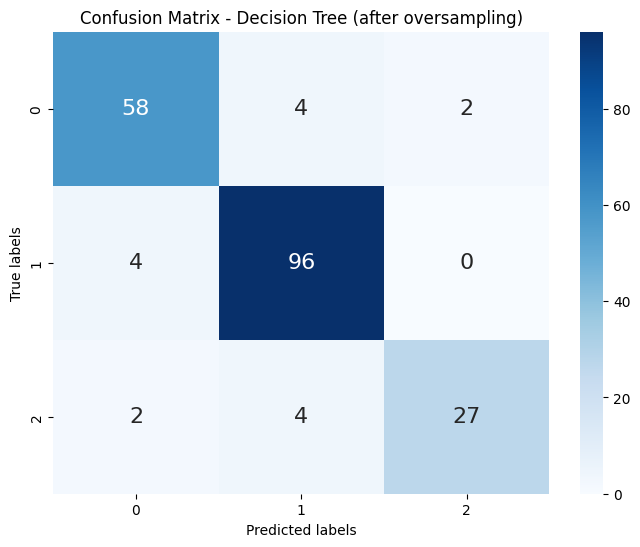

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix for Decision Tree classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt2, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree (after oversampling)')
plt.show()


As we can see after applying both the classifiers, it is evident that Decision tree is better fir on our data as it is giving better accuracy that NB. Moreover, after applying Oversampling technique, the accuracy even incresed from 88% to 91%.   

Now, let's visualize the results

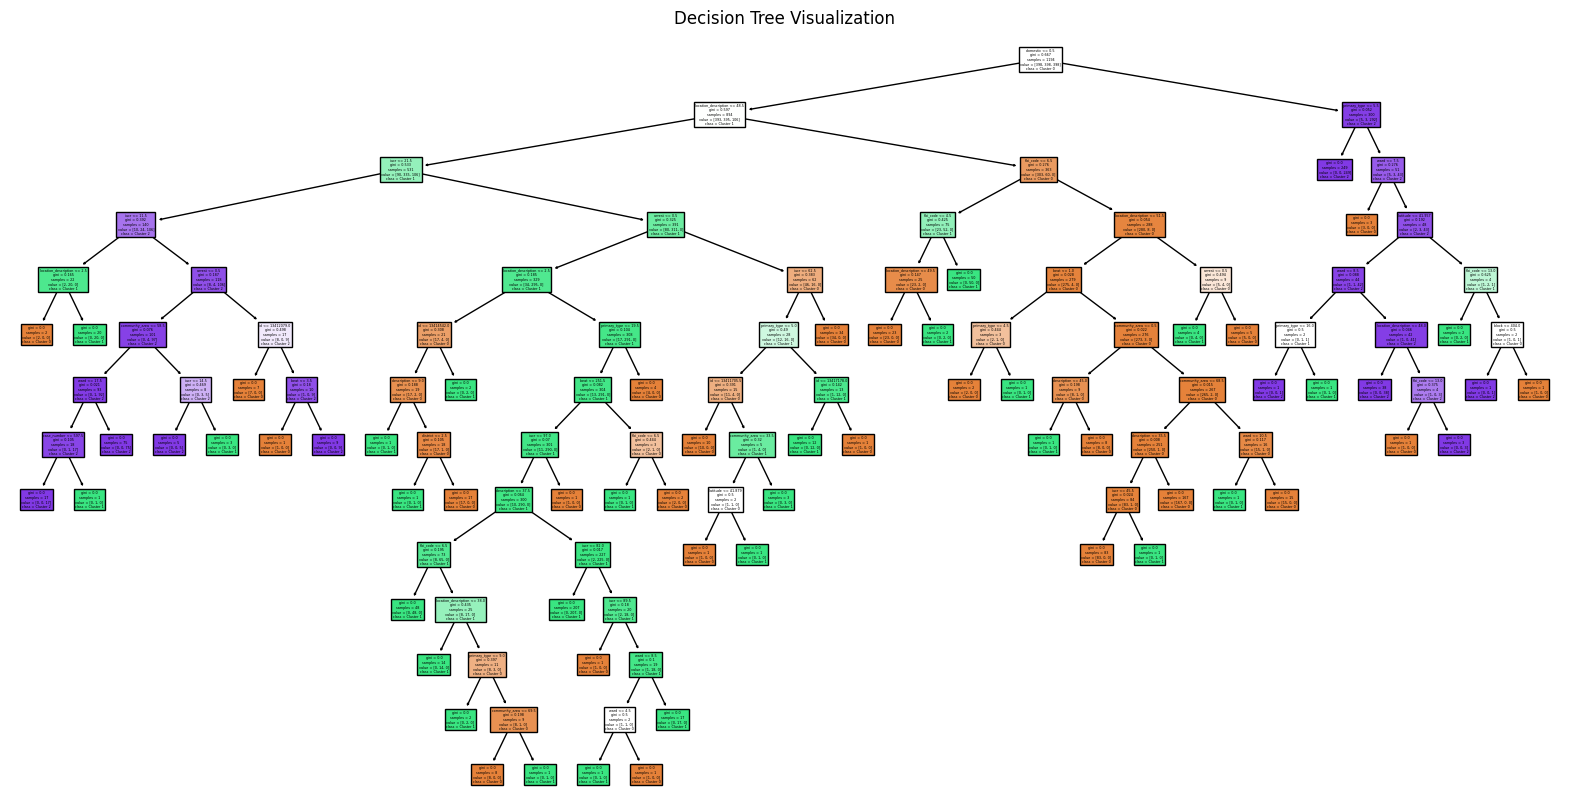

In [ ]:
from sklearn.tree import plot_tree

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier2, filled=True, feature_names=X.columns, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Decision Tree Visualization')
plt.show()
